<!--NAVIGATION-->
< [向量化的字符串操作](03.10-Working-With-Strings.ipynb) | [目录](Index.ipynb) | [高性能Pandas: eval() 和 query()](03.12-Performance-Eval-and-Query.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/03.11-Working-with-Time-Series.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Working with Time Series

# 在时间序列上操作

> Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.
Date and time data comes in a few flavors, which we will discuss here:

> - *Time stamps* reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
> - *Time intervals* and *periods* reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
> - *Time deltas* or *durations* reference an exact length of time (e.g., a duration of 22.56 seconds).

Pandas的发展过程具有很强的金融领域背景，因此你可以预料的是，它一定包括一整套工具用于处理日期、时间和时间索引数据。日期和时间数据有如下几类来源，我们会在本节中进行讨论：

- *时间戳* 代表着一个特定的时间点（例如2015年7月4日上午7点）。
- *时间间隔*和*周期* 代表着从开始时间点到结束时间点之间的时间单位长度；例如2015一整年。周期通常代表一段特殊的时间间隔，每个时间间隔的长度都是统一的，彼此之间不重叠（例如一天由24个小时组成）。
- *时间差*或*持续时间*代表这一段准确的时间长度（例如22.56秒持续时间）。

> In this section, we will introduce how to work with each of these types of date/time data in Pandas.
This short section is by no means a complete guide to the time series tools available in Python or Pandas, but instead is intended as a broad overview of how you as a user should approach working with time series.
We will start with a brief discussion of tools for dealing with dates and times in Python, before moving more specifically to a discussion of the tools provided by Pandas.
After listing some resources that go into more depth, we will review some short examples of working with time series data in Pandas.

在本节中，我们将介绍在Pandas中如何使用上述的这些时间类型数据。这个简短的小节不可能覆盖Python或Pandas中所有时间序列工具的内容，但可以作为引导你入门使用它们的一个概述。我们首先简要介绍一些在Python当中处理日期时间的工具，然后再进入到Pandas提供的相应工具的详细介绍上。在列出更加深入的学习资源之后，我们还会使用一些简短的例子在说明在Pandas中怎样处理时间序列数据。

## Dates and Times in Python

## Python中的日期和时间

> The Python world has a number of available representations of dates, times, deltas, and timespans.
While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python.

Python本身就带有很多有关日期、时间、时间差和间隔的表示方法。Pandas提供的时间序列工具在数据科学领域会更加的强大，但是首先学习相关的Python的工具包会对我们理解它们更加有帮助。

### Native Python dates and times: ``datetime`` and ``dateutil``

### 原生Python日期和时间：`datetime` 和 `dateutil`

> Python's basic objects for working with dates and times reside in the built-in ``datetime`` module.
Along with the third-party ``dateutil`` module, you can use it to quickly perform a host of useful functionalities on dates and times.
For example, you can manually build a date using the ``datetime`` type:

Python最基础的日期和时间处理包就是`datetime`。如果加上第三方的`dateutil`模块，你就能迅速的对日期和时间进行许多有用的操作了。例如，你可以手动创建一个`datetime`对象：

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

> Or, using the ``dateutil`` module, you can parse dates from a variety of string formats:

或者使用`dateutil`模块，你可以从许多不同的字符串格式中解析出`datetime`对象：

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

> Once you have a ``datetime`` object, you can do things like printing the day of the week:

获得`datetime`对象之后，你可以对它进行很多操作，包括输出这天是星期几：

In [3]:
date.strftime('%A')

'Saturday'

> In the final line, we've used one of the standard string format codes for printing dates (``"%A"``), which you can read about in the [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) of Python's [datetime documentation](https://docs.python.org/3/library/datetime.html).
Documentation of other useful date utilities can be found in [dateutil's online documentation](http://labix.org/python-dateutil).
A related package to be aware of is [``pytz``](http://pytz.sourceforge.net/), which contains tools for working with the most migrane-inducing piece of time series data: time zones.

在上面的代码中，我们使用了标准的字符串格式化编码来打印日期（`"%A"`），你可以在[时间格式化](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)在线文档中看到全部的说明。Python的`datetime`在线文档可以参考[datetime文档](https://docs.python.org/3/library/datetime.html)。其他很有用的日期时间工具`dateutil`的文档可在[dateutil在线文档](http://labix.org/python-dateutil)找到。还有一个值得注意的第三方包是[`pytz`](http://pytz.sourceforge.net/)，用来处理最头痛的时间序列数据：时区。

> The power of ``datetime`` and ``dateutil`` lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in.
Where they break down is when you wish to work with large arrays of dates and times:
just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

`datetime`和`dateutil`的强大在于它们灵活而易懂的语法：你可以使用这些对象內建的方法就可以完成几乎所有你感兴趣的时间操作。但是当对付大量的日期时间组成的数组时，它们就无法胜任了：就像Python的列表和NumPy的类型数组对比一样，Python的日期时间对象在这种情况下就无法与编码后的日期时间数组比较了。

### Typed arrays of times: NumPy's ``datetime64``

### 时间的类型数组：NumPy 的 `datetime64`

> The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
The ``datetime64`` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.
The ``datetime64`` requires a very specific input format:

Python日期时间对象的弱点促使NumPy的开发团队在NumPy中加入了优化的时间序列数据类型。`datetime64`数据类型将日期时间编码成了一个64位的整数，因此NumPy存储日期时间的格式非常紧凑。`datetime64`规定了非常明确的输入格式：

In [4]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

> Once we have this date formatted, however, we can quickly do vectorized operations on it:

然后我们就能立刻在这个日期数组之上应用向量化操作：

In [5]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

> Because of the uniform type in NumPy ``datetime64`` arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's ``datetime`` objects, especially as arrays get large
(we introduced this type of vectorization in [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb)).

因为NumPy数组中所有元素都具有统一的`datetime64`类型，上面的向量化操作将会比我们使用Python的`datetime`对象高效许多，特别是当数组变得很大的情况下（我们在[使用Numpy计算：通用函数](02.03-Computation-on-arrays-ufuncs.ipynb)中详细介绍过）。

> One detail of the ``datetime64`` and ``timedelta64`` objects is that they are built on a *fundamental time unit*.
Because the ``datetime64`` object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit.
In other words, ``datetime64`` imposes a trade-off between *time resolution* and *maximum time span*.

关于`datetime64`和`timedelta64`对象还有一个细节就是它们都是在*基本时间单位*之上构建的。因为`datetime64`被限制在64位精度上，因此它可被编码的时间范围就是$2^{64}$乘以相应的时间单位。换言之，`datetime64`需要在*时间精度*和*最大时间间隔*之间进行取舍。

> For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years.
NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

例如，如果时间单位是纳秒，`datetime64`类型能够编码的时间范围就是$2^{64}$纳秒，不到600年。NumPy可以自动从输入推断需要的时间精度（单位）；如下面是天为单位：

In [6]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

> Here is a minute-based datetime:

下面是分钟为单位：

In [7]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

> Notice that the time zone is automatically set to the local time on the computer executing the code.
You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

还需要注意的是，日期时间会自动按照本地计算机的时间来进行设置。你可以通过额外指定时间单位参数来设置你需要的精度；例如，下面使用的是纳秒单位：

In [8]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

> The following table, drawn from the [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lists the available format codes along with the relative and absolute timespans that they can encode:

下面这张表，来自[NumPy datetime64类型在线文档](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)，列出了可用的时间单位代码以及其相应的时间范围限制：

|代码    | 含义     | 时间范围 (相对) | 时间范围 (绝对)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | 年	       | ± 9.2e18 年       | [公元前9.2e18 至 公元后9.2e18] |
| ``M``  | 月       | ± 7.6e17 年       | [公元前7.6e17 至 公元后7.6e17] |
| ``W``  | 星期	       | ± 1.7e17 年       | [公元前1.7e17 至 公元后1.7e17] |
| ``D``  | 日         | ± 2.5e16 年       | [公元前2.5e16 至 公元后2.5e16] |
| ``h``  | 小时        | ± 1.0e15 年       | [公元前1.0e15 至 公元后1.0e15] |
| ``m``  | 分钟      | ± 1.7e13 年       | [公元前1.7e13 至 公元后1.7e13] |
| ``s``  | 秒      | ± 2.9e12 年       | [公元前2.9e9 至 公元后2.9e9]  |
| ``ms`` | 毫秒 | ± 2.9e9 年        | [公元前2.9e6 至 公元后2.9e6]  |
| ``us`` | 微秒 | ± 2.9e6 年        | [公元前290301 至 公元后294241] |
| ``ns`` | 纳秒  | ± 292 年          | [公元后1678 至 公元后2262]    |
| ``ps`` | 皮秒  | ± 106 天           | [公元后1969 至 公元后1970]    |
| ``fs`` | 飞秒 | ± 2.6 小时          | [公元后1969 至 公元后1970]    |
| ``as`` | 阿秒  | ± 9.2 秒        | [公元后1969 至 公元后1970]    |

> For the types of data we see in the real world, a useful default is ``datetime64[ns]``, as it can encode a useful range of modern dates with a suitably fine precision.

对于我们目前真实世界的数据来说，一个合适的默认值可以是`datetime64[ns]`，因为它既能包含现代的时间范围，也能提供相当高的时间精度。

> Finally, we will note that while the ``datetime64`` data type addresses some of the deficiencies of the built-in Python ``datetime`` type, it lacks many of the convenient methods and functions provided by ``datetime`` and especially ``dateutil``.
More information can be found in [NumPy's datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

最后，还要提醒的是，虽然`datetime64`数据类型解决了Python內建`datetime`类型的低效问题，但是它却缺少很多`datetime`特别是`dateutil`对象提供的很方便的方法。你可以在[NumPy的datetime64在线文档](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)中查阅更多相关内容。

### Dates and times in pandas: best of both worlds

### Pandas中的日期和时间：兼得所长

> Pandas builds upon all the tools just discussed to provide a ``Timestamp`` object, which combines the ease-of-use of ``datetime`` and ``dateutil`` with the efficient storage and vectorized interface of ``numpy.datetime64``.
From a group of these ``Timestamp`` objects, Pandas can construct a ``DatetimeIndex`` that can be used to index data in a ``Series`` or ``DataFrame``; we'll see many examples of this below.

Pandas在刚才介绍的那些工具的基础上构建了`Timestamp`对象，既包含了`datetime`和`dateutil`的简单易用，又吸收了`numpy.datetime64`的高效和向量化操作优点。将这些`Timestamp`对象组合起来之后，Pandas就能构建一个`DatetimeIndex`，能在`Series`或`DataFrame`当中对数据进行索引查找；我们下面会看到很多有关的例子。

> For example, we can use Pandas tools to repeat the demonstration from above.
We can parse a flexibly formatted string date, and use format codes to output the day of the week:

例如，我们使用Pandas工具可以重复上面的例子。我们可以将一个灵活表示时间的字符串解析成日期时间对象，然后用时间格式化代码进行格式化输出星期几：

In [9]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [10]:
date.strftime('%A')

'Saturday'

> Additionally, we can do NumPy-style vectorized operations directly on this same object:

并且，我们可以将NumPy风格的向量化操作直接应用在同一个对象上：

In [11]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

> In the next section, we will take a closer look at manipulating time series data with the tools provided by Pandas.

下面，我们将详细介绍使用Pandas提供的工具对时间序列进行操作的方法。

## Pandas Time Series: Indexing by Time

## Pandas时间序列：使用时间索引

> Where the Pandas time series tools really become useful is when you begin to *index data by timestamps*.
For example, we can construct a ``Series`` object that has time indexed data:

对于Pandas时间序列工具来说，*使用时间戳来索引数据*，才是真正吸引人的地方。例如，我们可以创建一个`Series`对象具有时间索引标签：

In [12]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

> Now that we have this data in a ``Series``, we can make use of any of the ``Series`` indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

这样我们就有了一个`Series`数据，我们可以将任何`Series`索引的方法应用到这个对象上，我们可以传入参数值，Pandas会自动转换为日期时间进行操作：

In [13]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

> There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

还有很多有关日期的索引方式，如下面将年作为参数传入，会得到一个全年数据的切片：

In [14]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

> Later, we will see additional examples of the convenience of dates-as-indices.
But first, a closer look at the available time series data structures.

后面我们会看到更多使用日期时间作为索引值的例子。首先来详细看看时间序列数据的结构。

## Pandas Time Series Data Structures

## Pandas时间序列数据结构

> This section will introduce the fundamental Pandas data structures for working with time series data:

> - For *time stamps*, Pandas provides the ``Timestamp`` type. As mentioned before, it is essentially a replacement for Python's native ``datetime``, but is based on the more efficient ``numpy.datetime64`` data type. The associated Index structure is ``DatetimeIndex``.
> - For *time Periods*, Pandas provides the ``Period`` type. This encodes a fixed-frequency interval based on ``numpy.datetime64``. The associated index structure is ``PeriodIndex``.
> - For *time deltas* or *durations*, Pandas provides the ``Timedelta`` type. ``Timedelta`` is a more efficient replacement for Python's native ``datetime.timedelta`` type, and is based on ``numpy.timedelta64``. The associated index structure is ``TimedeltaIndex``.

这部分内容会介绍Pandas在处理时间序列数据时候使用的基本数据结构：

- 对于*时间戳*，Pandas提供了`Timestamp`类型。正如上面所述，它可以作为Python原生`datetime`类型的替代，但是它是构建在`numpy.datetime64`数据类型之上的。对应的索引结构是`DatetimeIndex`。
- 对于*时间周期*，Pandas提供了`Period`类型。它是在`numpy.datetime64`的基础上编码了一个固定周期间隔的时间。对应的索引结构是`PeriodIndex`。
- 对于*时间差*或*持续时间*，Pandas提供了`Timedelta`类型。构建于`numpy.timedelta64`之上，是Python原生`datetime.timedelta`类型的高性能替代。对应的索引结构是`TimedeltaIndex`。

> The most fundamental of these date/time objects are the ``Timestamp`` and ``DatetimeIndex`` objects.
While these class objects can be invoked directly, it is more common to use the ``pd.to_datetime()`` function, which can parse a wide variety of formats.
Passing a single date to ``pd.to_datetime()`` yields a ``Timestamp``; passing a series of dates by default yields a ``DatetimeIndex``:

上述这些日期时间对象中最基础的是`Timestamp`和`DatetimeIndex`对象。虽然这些对象可以直接被创建，但是更通用的做法是使用`pd.to_datetime()`函数，该函数可以将多种格式的字符串解析成日期时间。将一个日期时间传递给`pd.to_datetime()`会得到一个`Timestamp`对象；将一系列的日期时间传递过去会得到一个`DatetimeIndex`对象：

In [15]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

> Any ``DatetimeIndex`` can be converted to a ``PeriodIndex`` with the ``to_period()`` function with the addition of a frequency code; here we'll use ``'D'`` to indicate daily frequency:

任何`DatetimeIndex`对象都能使用`to_period()`函数转换成`PeriodIndex`对象，不过需要额外指定一个频率的参数码；下面我们使用`'D'`来指定频率为天：

In [16]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

> A ``TimedeltaIndex`` is created, for example, when a date is subtracted from another:

`TimedeltaIndex`对象可以通过日期时间相减来创建，例如：

In [17]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: ``pd.date_range()``

### 规则序列：`pd.date_range()`

> To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: ``pd.date_range()`` for timestamps, ``pd.period_range()`` for periods, and ``pd.timedelta_range()`` for time deltas.
We've seen that Python's ``range()`` and NumPy's ``np.arange()`` turn a startpoint, endpoint, and optional stepsize into a sequence.
Similarly, ``pd.date_range()`` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates.
By default, the frequency is one day:

Pandas提供了三个函数来创建规则的日期时间序列，`pd.date_range()`来创建时间戳的序列，`pd.period_range()`来创建周期的序列，`pd.timedelta_range()`来创建时间差的序列。我们都已经学习过Python的`range()`和NumPy的`arange()`了，它们接受开始点、结束点和可选的步长参数来创建序列。同样，`pd.date_range()`接受开始日期时间、结束日期时间和可选的周期码来创建日期时间的规则序列。默认周期为一天：

In [18]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

> Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods:

而且，日期时间的范围不仅能通过结束日期时间指定，还能通过开始日期时间和一个持续值来指定：

In [19]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

> The spacing can be modified by altering the ``freq`` argument, which defaults to ``D``.
For example, here we will construct a range of hourly timestamps:

日期时间的间隔可以通过指定`freq`频率参数来修改，否则默认为天`D`。例如，下面创建一段以小时为间隔单位的时间范围：

In [20]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

> To create regular sequences of ``Period`` or ``Timedelta`` values, the very similar ``pd.period_range()`` and ``pd.timedelta_range()`` functions are useful.
Here are some monthly periods:

要创建`Period`或`Timedelta`对象，可以类似的调用`pd.period_range()`和`pd.timedelta_range()`函数。下面是以月为单位的时间周期序列：

In [21]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

> And a sequence of durations increasing by an hour:

下面是以小时为单位的持续时间序列：

In [22]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

> All of these require an understanding of Pandas frequency codes, which we'll summarize in the next section.

上述函数都需要我们理解Pandas的频率编码，我们马上会介绍它。

## Frequencies and Offsets

## 频率和偏移值

> Fundamental to these Pandas time series tools is the concept of a frequency or date offset.
Just as we saw the ``D`` (day) and ``H`` (hour) codes above, we can use such codes to specify any desired frequency spacing.
The following table summarizes the main codes available:

要使用Pandas时间序列工具，我们需要理解频率和时间偏移值的概念。就像前面我们看到的`D`代表天和`H`代表小时一样，我们可以使用这类符号码指定需要的频率间隔。下表总结了主要的频率码：

| 码   | 说明         | 码   | 说明          |
|--------|---------------------|--------|----------------------|
| ``D``  | 自然日        | ``B``  | 工作日        |
| ``W``  | 周              |        |                      |
| ``M``  | 自然日月末           | ``BM`` | 工作日月末   |
| ``Q``  | 自然日季末         | ``BQ`` | 工作日季末 |
| ``A``  | 自然日年末            | ``BA`` | 工作日年末    |
| ``H``  | 自然小时               | ``BH`` | 工作小时       |
| ``T``  | 分钟             |        |                      |
| ``S``  | 秒             |        |                      |
| ``L``  | 毫秒         |        |                      |
| ``U``  | 微秒        |        |                      |
| ``N``  | 纳秒         |        |                      |

> The monthly, quarterly, and annual frequencies are all marked at the end of the specified period.
By adding an ``S`` suffix to any of these, they instead will be marked at the beginning:

上面的月、季度和年都代表着该时间周期的结束时间。如果在这些码后面加上`S`后缀，则代表这些时间周期的起始时间：

| 码    | 说明            || 码    | 说明            |
|---------|------------------------||---------|------------------------|
| ``MS``  | 自然日月初            ||``BMS``  | 工作日月初   |
| ``QS``  | 自然日季初          ||``BQS``  | 工作日季初 |
| ``AS``  | 自然日年初             ||``BAS``  | 工作日年初    |

> Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

> - ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
> - ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

并且你可以通过在季度或者年的符号码后面添加三个字母的月份缩写来指定周期进行分隔的月份：

- ``Q-JAN``、``BQ-FEB``、``QS-MAR``、``BQS-APR``等
- ``A-JAN``、``BA-FEB``、``AS-MAR``、``BAS-APR``等

> In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

> - ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

同样，每周的分隔日也可以通过在周符号码后面添加三个字母的星期几缩写来指定：

- ``W-SUN``、``W-MON``、``W-TUE``、``W-WED``等

> On top of this, codes can be combined with numbers to specify other frequencies.
For example, for a frequency of 2 hours 30 minutes, we can combine the hour (``H``) and minute (``T``) codes as follows:

在此之上，符号码还可以进行组合用来代表其他的频率。例如要表示2小时30分钟的频率，我们可以通过将小时（`H`）和分钟（`T`）的符号码进行组合得到：

In [23]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

> All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the ``pd.tseries.offsets`` module.
For example, we can create a business day offset directly as follows:

上述的这些短的符号码实际上是Pandas时间序列偏移值的对象实例的别名，你可以在`pd.tseries.offsets`模块中找到这些偏移值实例。例如，我们也可以通过一个偏移值对象实例来创建时间序列：

In [24]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

> For more discussion of the use of frequencies and offsets, see the ["DateOffset" section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects) of the Pandas documentation.

更多有关频率和偏移值的讨论，请参阅Pandas在线文档[日期时间偏移值章节](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects)。

## Resampling, Shifting, and Windowing

## 重新取样、移动和窗口

> The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools.
The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

使用日期和时间作为索引来直观的组织和访问数据的能力，是Pandas时间序列工具的重要功能。前面介绍过的索引的那些通用优点（自动对齐，直观的数据切片和访问等）依然有效，而且Pandas提供了许多额外的时间序列相关操作。

> We will take a look at a few of those here, using some stock price data as an example.
Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data.
For example, the accompanying ``pandas-datareader`` package (installable via ``conda install pandas-datareader``), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others.
Here we will load Google's closing price history:

我们会在这里介绍其中的一些，使用股票价格数据作为例子。因为Pandas是在金融背景基础上发展而来的，因此它具有一些特别的金融数据相关工具。例如，`pandas-datareader`包（可以通过`conda install pandas-datareader`进行安装）可以被用来从许多可用的数据源导入金融数据，包括Yahoo金融，Google金融和其他。下面我们将载入Google的收市价历史数据：

译者注：在新版的`pandas-datareader`中，数据源`google`已经不被支持，因此，译者采用了`yahoo`数据源。

In [28]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


> For simplicity, we'll use just the closing price:

为简单起见，我们仅使用收市价：

In [29]:
goog = goog['Close']

> We can visualize this using the ``plot()`` method, after the normal Matplotlib setup boilerplate (see [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)):

我们可以使用`plot()`方法来做出图表，当然之前要先完成Matplotlib的相关初始化工作（参见[第四章](04.00-Introduction-To-Matplotlib.ipynb)）：

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

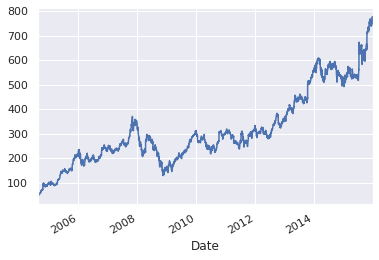

In [31]:
goog.plot();

### Resampling and converting frequencies

### 重新采样和改变频率

> One common need for time series data is resampling at a higher or lower frequency.
This can be done using the ``resample()`` method, or the much simpler ``asfreq()`` method.
The primary difference between the two is that ``resample()`` is fundamentally a *data aggregation*, while ``asfreq()`` is fundamentally a *data selection*.

对于时间序列数据来说有一个很普遍的需求是对数据根据更高或更低的频率进行重新取样。这可以通过`resample()`方法或更简单的`asfreq()`方法来实现。两者的主要区别在于`resample()`主要进行*数据聚合*操作，而`asfreq()`方法主要进行*数据选择*操作。

> Taking a look at the Google closing price, let's compare what the two return when we down-sample the data.
Here we will resample the data at the end of business year:

观察一下谷歌的收市价，让我们来比较一下使用两者对数据进行更低频率来采样的情况。下面我们对数据进行每个工作日年度进行重新取样：

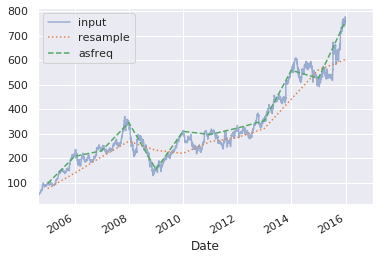

In [32]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

> Notice the difference: at each point, ``resample`` reports the *average of the previous year*, while ``asfreq`` reports the *value at the end of the year*.

注意这里的区别：在每个点，`resample`返回了*这一个年度*的平均值，而`asfreq`返回了*年末的收市值*。

> For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

对于采用更高频率的取样来说，`resample()`和`asfreq()`方法大体上是相同的，虽然resample有着更多的参数。在这个例子中，默认的方式是将更高频率的采样点填充为空值，即NA值。就像之前介绍过的`pd.fillna()`函数那样，`asfreq()`方法接受一个`method`参数来指定值以那种方式插入。下面，我们将原本数据的工作日频率扩张为自然日频率（即包括周末）：

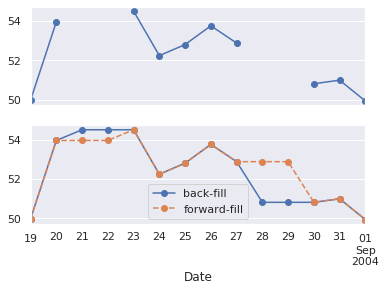

In [33]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

> The top panel is the default: non-business days are left as NA values and do not appear on the plot.
The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

上面的子图表是默认的：非工作日的数据点被填充为NA值，因此在图中没有显示。下面的子图表展示了两种不同填充方法的差别：前向填充和后向填充。

### Time-shifts

### 时间移动

> Another common time series-specific operation is shifting of data in time.
Pandas has two closely related methods for computing this: ``shift()`` and ``tshift()``
In short, the difference between them is that ``shift()`` *shifts the data*, while ``tshift()`` *shifts the index*.
In both cases, the shift is specified in multiples of the frequency.

另一个普遍的时间序列相关操作是移动时间。Pandas有两个很接近的方法来实现时间的移动：`shift()`和`tshift`。简单来说，`shift()`*移动的是数据*，而`tshift()`*移动的是时间索引*。两个方法使用的移动参数都是当前频率的倍数。

> Here we will both ``shift()`` and ``tshift()`` by 900 days; 

下面我们使用`shift()`和`tshift()`方法将数据和时间索引移动900天：

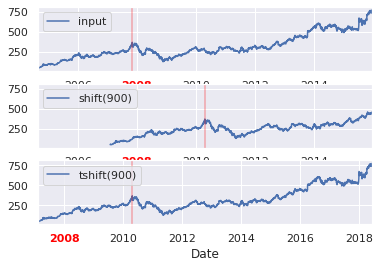

In [34]:
fig, ax = plt.subplots(3, sharey=True)

# 在数据上应用一个频率
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0]) # 画出原图
goog.shift(900).plot(ax=ax[1]) # 数据移动900天
goog.tshift(900).plot(ax=ax[2]) # 时间移动900天

# 图例和标签
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

> We see here that ``shift(900)`` shifts the *data* by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while ``tshift(900)`` shifts the *index values* by 900 days.

上例中，我们看到`shift(900)`将*数据*向前移动了900天，导致部分数据都超过了图表的右侧范围（左侧新出现的值被填充为NA值），而`tshift(900)`将*时间*向后移动了900天。

> A common context for this type of shift is in computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset:

这种时间移动的常见应用场景是计算同比时间段的差值。例如，我们可以将数据时间向前移动365天来计算谷歌股票的年投资回报率：

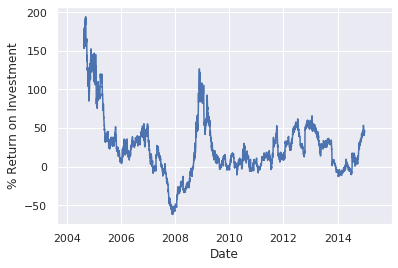

In [35]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

> This helps us to see the overall trend in Google stock: thus far, the most profitable times to invest in Google have been (unsurprisingly, in retrospect) shortly after its IPO, and in the middle of the 2009 recession.

这帮助我们看到谷歌股票的整体趋势：直到目前为止，投资谷歌股票回报最高的时期（完全不令人惊讶）是IPO之后的短暂时期以及2009中期经济衰退的时期。

### Rolling windows

### 滚动窗口

> Rolling statistics are a third type of time series-specific operation implemented by Pandas.
These can be accomplished via the ``rolling()`` attribute of ``Series`` and ``DataFrame`` objects, which returns a view similar to what we saw with the ``groupby`` operation (see [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb)).
This rolling view makes available a number of aggregation operations by default.

滚动窗口统计是第三种Pandas时间序列相关的普遍操作。这个统计任务可以通过`Series`和`DataFrame`对象的`rolling()`方法来实现，这个方法的返回值类似与我们之前看到的`groupby`操作（参见[聚合与分组](03.08-Aggregation-and-Grouping.ipynb)）。在该滚动窗口视图上可以进行一系列的聚合操作。

> For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

例如，下面是对谷歌股票价格在365个记录中居中求平均值和标准差的结果：

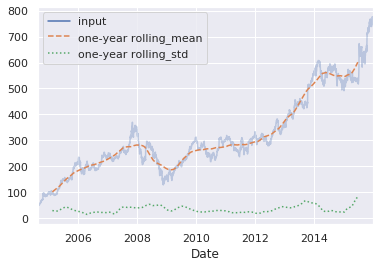

In [36]:
rolling = goog.rolling(365, center=True) # 对365个交易日的收市价进行滚动窗口居中

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(), # 平均值Series
                     'one-year rolling_std': rolling.std()}) # 标准差Series
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

> As with group-by operations, the ``aggregate()`` and ``apply()`` methods can be used for custom rolling computations.

和groupby操作一样，`aggregate()`和`apply()`方法可以在滚动窗口上实现自定义的统计计算。

## Where to Learn More

## 更多学习资源

> This section has provided only a brief summary of some of the most essential features of time series tools provided by Pandas; for a more complete discussion, you can refer to the ["Time Series/Date" section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) of the Pandas online documentation.

本节只是简要的介绍了Pandas提供的时间序列工具中最关键的特性；需要完整的内容介绍，你可以访问Pandas在线文档的["时间序列/日期"章节](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)。

> Another excellent resource is the textbook [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) by Wes McKinney (OReilly, 2012).
Although it is now a few years old, it is an invaluable resource on the use of Pandas.
In particular, this book emphasizes time series tools in the context of business and finance, and focuses much more on particular details of business calendars, time zones, and related topics.

还有一个很棒的资源是[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)教科书，作者Wes McKinney (OReilly, 2012)。虽然已经出版了好几年，这本书仍然是Pandas使用的非常有价值的资源。特别是书中着重介绍在商业和金融领域中使用时间序列相关工具的内容，还有许多对商业日历，时区等相关主题的讨论。

> As always, you can also use the IPython help functionality to explore and try further options available to the functions and methods discussed here. I find this often is the best way to learn a new Python tool.

当然别忘了，你可以使用IPython的帮助和文档功能来学习和尝试这些工具方法的不同参数。这通常是学习Python工具最佳实践。

## Example: Visualizing Seattle Bicycle Counts

## 例子：西雅图自行车统计可视化

> As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

最后作为一个更深入的处理时间序列数据例子，我们来看一下西雅图费利蒙桥的自行车数量统计。该数据集来源自一个自动自行车的计数器，在2012年末安装上线，它们能够感应到桥上东西双向通过的自行车并进行计数。按照小时频率采样的自行车数量计数数据集可以在[这个链接处](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k)直接下载。

> As of summer 2016, the CSV can be downloaded as follows:

2016年夏天的数据可以使用下面的命令下载：

In [34]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

> Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

下载了数据集后，我们就可以用Pandas将CSV文件的内容导入成`DataFrame`对象。我们指定使用日期作为行索引，还可以通过`parse_dates`参数要求Pandas自动帮我们转换日期时间格式：

In [43]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


> For convenience, we'll further process this dataset by shortening the column names and adding a "Total" column:

为了简单，我们将这个数据集的列名改的简短些，并增加总计“Total”列：

译者注：最新下载的数据集自带Total列，因此，只需要缩短列名即可，下面的代码译者注释了原来的代码，并使用一行代码将列名缩短。

In [44]:
# data.columns = ['West', 'East']
# data['Total'] = data.eval('West + East')
data.columns = ['Total', 'East', 'West']

> Now let's take a look at the summary statistics for this data:

现在我们来看看这个数据集的总体情况：

In [45]:
data.dropna().describe()

,Total,East,West
count,10771.000000,10771.000000,10771.000000
mean,99.713861,51.416489,48.297373
std,120.397155,63.867062,67.568734
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,57.000000,29.000000,26.000000
75%,134.000000,69.000000,60.000000
max,831.000000,626.000000,593.000000


### Visualizing the data

### 可视化数据

> We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

我们可以通过将数据可视化成图表来更好的观察分析数据集。首先我们来展示原始数据图表：

In [46]:
%matplotlib inline
import seaborn; seaborn.set()

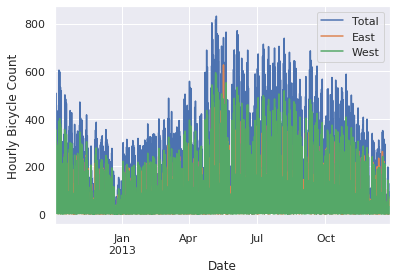

In [47]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

> The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week:

约25000小时的样本数据画在图中非常拥挤，我们很观察到什么有意义的结果。我们可以通过重新取样，降低频率来获得更粗颗粒度的图像。如下面按照每周来重新取样：

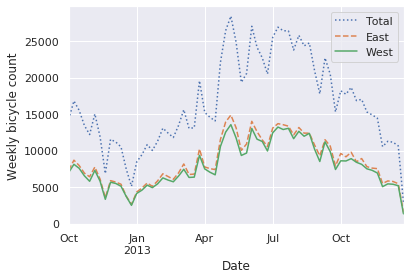

In [48]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

> This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) where we explore this further).

上图向我们展示非常有趣的季节性趋势：你应该已经预料到，人们在夏季会比冬季更多的骑自行车，即使在一个季节中，每周自行车的数量也有很大起伏（这主要是由于天气造成的；我们会在[深入：线性回归](05.06-Linear-Regression.ipynb)中会更加深入的讨论）。

> Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

还有一个很方便的聚合操作就是滚动平均值，使用`pd.rolling_mean()`函数。下面我们进行30天的滚动平均，窗口居中进行统计：

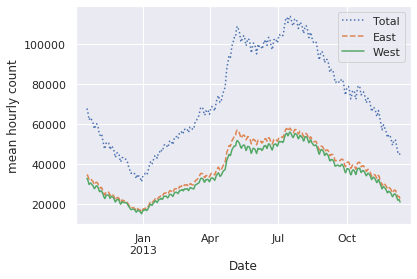

In [49]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

> The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

上图结果中的锯齿图案产生的原因是窗口边缘的硬切割造成的。我们可以使用不同的窗口类型来获得更加平滑的结果，例如高斯窗口。下面的代码制定了窗口的宽度（50天）和窗口内的高斯宽度（10天）：

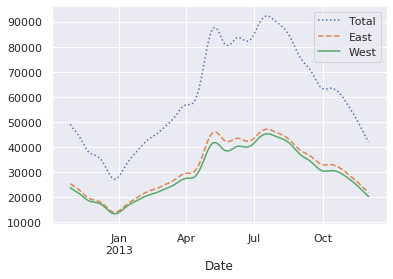

In [51]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Digging into the data

### 挖掘数据

> While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

虽然上面的光滑折线图展示了大体的数据趋势情况，但是很多有趣的结构依然没有展现出来。例如，我们希望对每天不同时段的平均交通情况进行统计，我们可以使用[聚合与分组](03.08-Aggregation-and-Grouping.ipynb)中介绍过的GroupBy功能：

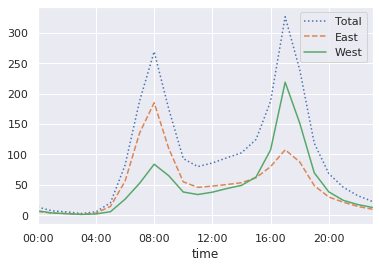

In [52]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6) # 将24小时分为每4个小时一段展示
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

> The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

小时交通数据图展现了明显的双峰构造，峰值大约出现在早上8:00和下午5:00。这显然就是大桥在通勤时间交通繁忙的最好证据。再注意到东西双向峰值不同，证明了早上通勤时间多数的交通流量是从东至西（往西雅图城中心方向），而下午通勤时间多数的交通流量是从西至东（离开西雅图城中心方向）。

> We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

我们可能也会很好奇一周中每天的平均交通情况。当然，还是通过简单的GroupBy就能实现：

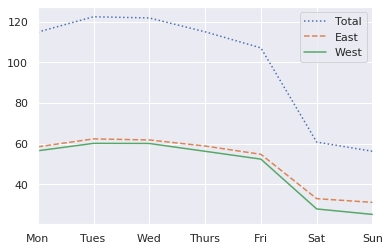

In [53]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

> This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

上图清晰的展示了工作日和休息日的区别，周一到周五的流量基本上达到周六日的两倍。

> With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

有了上面两个分析的基础，让我们来进行一个更加复杂的分组查看工作日和休息日按照小时交通流量的情况。我们首先使用`np.where`将工作日和休息日分开：

In [54]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

> Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

然后我们使用将在[多个子图表](04.08-Multiple-Subplots.ipynb)中介绍的方法将两个子图表并排展示：

译者注：因为`DataFrame.ix`已经不推荐使用，因此下面代码中的索引符改成了loc。

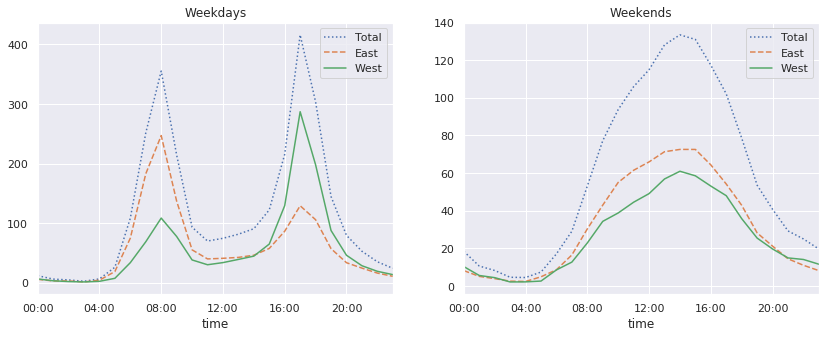

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

> The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.
We will also revisit this dataset in the context of modeling in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).

这个结果非常有趣：我们可以在工作日看到明显的双峰构造，但是在休息日就只能看到一个峰。如果我们继续挖掘下去，这个数据集还有更多有趣的结构可以被发现，可以分析天气、气温、每年的不同时间以及其他因素是如何影响居民的通勤方式的；要深入讨论，可以参见作者的博客文章["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)，里面使用了这个数据集的子集。我们也会在[深入：线性回归](05.06-Linear-Regression.ipynb)小节中再次遇到这个数据集。

<!--NAVIGATION-->
< [向量化的字符串操作](03.10-Working-With-Strings.ipynb) | [目录](Index.ipynb) | [高性能Pandas: eval() 和 query()](03.12-Performance-Eval-and-Query.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/03.11-Working-with-Time-Series.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
